# Introduction

The NBA-games dataset is a really great dataset with lots of information about players, teams and results that can be put together in order to create a predictive model for future games. The main focus of the notebook is to create a dataset for predictive modelling and at a second step to trim it down to few features in order to enhance interpretability. Let's get started! 

We have 5 datasets at our disposal:

**Games:** Information about each game and the stats of the teams playing
| Field  | Description  |
|---|---|
| GAME_DATE_EST  | Game's date  |
| GAME_ID  | ID of the game  |
| GAME_STATUS_TEXT  |  Status : Final means that the is completed |
| HOME_TEAM_ID | ID of the home team |
| VISITOR_TEAM_ID | ID of the visitor team |
| SEASON | Season when the game occured |
| TEAM_ID_home | ID of the home team (dupplicate of HOME_TEAM_ID) |
| PTS_home | Number of points scored by home team |
| FG_PCT_home | Field Goal Percentage home team |
| FT_PCT_home | Free Throw Percentage of the home team |

<br></br>
**Games details:** More detailed information about the individual player stats
| Field  | Description  |
|---|---|
| GAME_ID | ID of the game |
| TEAM_ID | ID of the team |
| TEAM_ABBREVIATION | Team's abbreviation |
| TEAM_CITY | City where the game was played |
| PLAYER_ID | ID of the player |
| PLAYER_NAME | Player's name |
| NICKNAME | Position of the player (if nothing then he's on the bench) |
| START_POSITION | Comment |
| COMMENT | Note |
| MIN | Minutes Played |
| FGA | Field Goal Attempts |
| FGM | Field Goals Made |
| FG3A | 3pt attempts made |
| FG3M | 3pt shots made |
| FTA | Free Throw Attempts |
| FTM | Free Throws Made |
| OREB | Offensive Rebounds |
| DREB | Defensive Rebounds |
| REB  | Total Rebounds |
| AST  | Assists |
| STL  | Steal |
| BLK  | Block |
| TO | Turnover |
| PF | Personal Foul |
| PTS | Points Scored |
| PLUS_MINUS | A measure of a player's impact on the game.  It's calculated by comparing the point differential when a player is on the court versus when they are off the court.|

<br></br>
**Players:** Information about the name of the player and his team
| Field  | Description  |
|---|---|
| PLAYER_NAME | Player's name |
| TEAM_ID | ID of the team |
| PLAYER_ID | ID of the player |
| SEASON | Season |

<br></br>
**Ranking:** Information about the standings of each team on individual days throughout the season
| Field  | Description  |
|---|---|
| TEAM_ID | ID of the team |
| LEAGUE_ID | ID of the league (here only NBA) |
| SEASON_ID | Season |
| STANDINGSDATE | Standings date |
| CONFERENCE | Conference (west or east) |
| TEAM | Team name |
| G | Number of games played on the season |
| W | Number of winning games on the season |
| L | Number of loosing games on the season |
| W_PCT | Win % |

<br></br>
**Teams:** Information about the team including ownership, arena, when it was established etc.
| Field  | Description  |
|---|---|
| LEAGUE_ID | ID of the league (here only NBA) |
| TEAM_ID | ID of the team |
| MIN_YEAR | Minimum year of the team into NBA championship |
| MAX_YEAR | Maximum year of the team into NBA championship |
| ABBREVIATION | Abbreviation of team name |
| YEARFOUNDED | Founded Year |
| City | Team's city |
| ARENA | Team's stadium |
| ARENACAPACITY | Capacity of stadium |





# Import Libraries and Data

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd


# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
games = pd.read_csv('games.csv')
games_details = pd.read_csv('games_details.csv')
players = pd.read_csv('players.csv')
ranking = pd.read_csv("ranking.csv")
teams = pd.read_csv("teams.csv")

/tmp/ipykernel_21616/1049295955.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv('games_details.csv')


# Data Check

#### **POINTS: 15**
- View the first five entries of each dataframe
- Determine the number of entries in each dataframe
- Check the data types for each dataframe
- Check for missing values
- Create a statistical summary of the numerical data



**Games:**

In [4]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.000,0.484,0.926,...,25.000,46.000,1610612759,117.000,0.478,0.815,0.321,23.000,44.000,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.000,0.488,0.952,...,16.000,40.000,1610612764,112.000,0.561,0.765,0.333,20.000,37.000,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.000,0.482,0.786,...,22.000,37.000,1610612749,106.000,0.470,0.682,0.433,20.000,46.000,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.000,0.441,0.909,...,27.000,49.000,1610612765,93.000,0.392,0.735,0.261,15.000,46.000,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.000,0.429,1.000,...,22.000,47.000,1610612741,110.000,0.500,0.773,0.292,20.000,47.000,0


In [5]:
games.shape

(26651, 21)

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [7]:
games.isnull().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [8]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
GAME_ID,26651.000,21754866.961,5570189.474,10300001.000,20700010.500,21200763.000,21800046.500,52100211.000
HOME_TEAM_ID,26651.000,1610612751.368,8.639,1610612737.000,1610612744.000,1610612751.000,1610612759.000,1610612766.000
VISITOR_TEAM_ID,26651.000,1610612751.408,8.659,1610612737.000,1610612744.000,1610612751.000,1610612759.000,1610612766.000
SEASON,26651.000,2012.114,5.587,2003.000,2007.000,2012.000,2017.000,2022.000
TEAM_ID_home,26651.000,1610612751.368,8.639,1610612737.000,1610612744.000,1610612751.000,1610612759.000,1610612766.000
PTS_home,26552.000,103.456,13.283,36.000,94.000,103.000,112.000,168.000
FG_PCT_home,26552.000,0.461,0.057,0.250,0.422,0.460,0.500,0.684
FT_PCT_home,26552.000,0.760,0.101,0.143,0.697,0.765,0.833,1.000
FG3_PCT_home,26552.000,0.356,0.111,0.000,0.286,0.357,0.429,1.000
AST_home,26552.000,22.823,5.193,6.000,19.000,23.000,26.000,50.000


**Games Details:**

In [9]:
games_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.000,1.000,2.000,0.000,1.000,0.000,2.000,5.000,2.000,-2.000
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.000,3.000,9.000,6.000,1.000,0.000,2.000,1.000,23.000,-14.000
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.000,3.000,4.000,1.000,1.000,0.000,2.000,4.000,13.000,-4.000
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.000,9.000,9.000,5.000,3.000,0.000,2.000,1.000,10.000,-18.000
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.000,2.000,2.000,3.000,0.000,0.000,2.000,2.000,19.000,0.000


In [10]:
games_details.shape

(668628, 29)

In [11]:
games_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

In [12]:
games_details.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       412863
COMMENT              558939
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

In [13]:
games_details.describe().T

,count,mean,std,min,25%,50%,75%,max
GAME_ID,668628.000,21717713.532,5656289.029,10300001.000,20700032.000,21200962.000,21800141.000,52100211.000
TEAM_ID,668628.000,1610612751.400,8.652,1610612737.000,1610612744.000,1610612751.000,1610612759.000,1610612766.000
PLAYER_ID,668628.000,401343.369,7225617.747,15.000,2466.000,201181.000,203471.000,1962937827.000
FGM,558938.000,3.588,3.030,0.000,1.000,3.000,5.000,28.000
FGA,558938.000,7.897,5.677,0.000,3.000,7.000,11.000,50.000
FG_PCT,558938.000,0.417,0.252,0.000,0.267,0.429,0.571,1.000
FG3M,558938.000,0.778,1.228,0.000,0.000,0.000,1.000,14.000
FG3A,558938.000,2.186,2.570,0.000,0.000,1.000,4.000,24.000
FG3_PCT,558938.000,0.201,0.290,0.000,0.000,0.000,0.400,1.000
FTM,558938.000,1.733,2.354,0.000,0.000,1.000,3.000,26.000


**Players:**

In [14]:
players.head()

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [15]:
players.shape

(7228, 4)

In [16]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER_NAME  7228 non-null   object
 1   TEAM_ID      7228 non-null   int64 
 2   PLAYER_ID    7228 non-null   int64 
 3   SEASON       7228 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 226.0+ KB


In [17]:
players.isnull().sum()

PLAYER_NAME    0
TEAM_ID        0
PLAYER_ID      0
SEASON         0
dtype: int64

In [18]:
players.describe().T

,count,mean,std,min,25%,50%,75%,max
TEAM_ID,7228.000,1610612751.369,8.724,1610612737.000,1610612744.000,1610612751.000,1610612759.000,1610612766.000
PLAYER_ID,7228.000,2355861.976,61066884.734,244.000,200768.000,202346.500,203910.000,1962937827.000
SEASON,7228.000,2014.160,3.126,2009.000,2012.000,2014.000,2017.000,2019.000


**Ranking:**

In [19]:
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN


In [20]:
ranking.shape

(210342, 13)

In [21]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210342 entries, 0 to 210341
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        210342 non-null  int64  
 1   LEAGUE_ID      210342 non-null  int64  
 2   SEASON_ID      210342 non-null  int64  
 3   STANDINGSDATE  210342 non-null  object 
 4   CONFERENCE     210342 non-null  object 
 5   TEAM           210342 non-null  object 
 6   G              210342 non-null  int64  
 7   W              210342 non-null  int64  
 8   L              210342 non-null  int64  
 9   W_PCT          210342 non-null  float64
 10  HOME_RECORD    210342 non-null  object 
 11  ROAD_RECORD    210342 non-null  object 
 12  RETURNTOPLAY   3990 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 20.9+ MB


In [22]:
ranking.isnull().sum()

TEAM_ID               0
LEAGUE_ID             0
SEASON_ID             0
STANDINGSDATE         0
CONFERENCE            0
TEAM                  0
G                     0
W                     0
L                     0
W_PCT                 0
HOME_RECORD           0
ROAD_RECORD           0
RETURNTOPLAY     206352
dtype: int64

In [23]:
ranking.describe().T

,count,mean,std,min,25%,50%,75%,max
TEAM_ID,210342.000,1610612751.474,8.642,1610612737.000,1610612744.000,1610612751.000,1610612759.000,1610612766.000
LEAGUE_ID,210342.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
SEASON_ID,210342.000,21401.055,2395.250,12003.000,22006.000,22011.000,22017.000,22022.000
G,210342.000,56.660,28.644,0.000,32.000,67.000,82.000,82.000
W,210342.000,28.333,17.269,0.000,14.000,28.000,42.000,73.000
L,210342.000,28.326,17.261,0.000,14.000,29.000,41.000,72.000
W_PCT,210342.000,0.493,0.188,0.000,0.372,0.500,0.621,1.000
RETURNTOPLAY,3990.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


**Teams:**

In [24]:
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.000,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.000,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.000,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.000,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [25]:
teams.shape

(30, 14)

In [26]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEAGUE_ID           30 non-null     int64  
 1   TEAM_ID             30 non-null     int64  
 2   MIN_YEAR            30 non-null     int64  
 3   MAX_YEAR            30 non-null     int64  
 4   ABBREVIATION        30 non-null     object 
 5   NICKNAME            30 non-null     object 
 6   YEARFOUNDED         30 non-null     int64  
 7   CITY                30 non-null     object 
 8   ARENA               30 non-null     object 
 9   ARENACAPACITY       26 non-null     float64
 10  OWNER               30 non-null     object 
 11  GENERALMANAGER      30 non-null     object 
 12  HEADCOACH           30 non-null     object 
 13  DLEAGUEAFFILIATION  30 non-null     object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


In [27]:
teams.isnull().sum()

LEAGUE_ID             0
TEAM_ID               0
MIN_YEAR              0
MAX_YEAR              0
ABBREVIATION          0
NICKNAME              0
YEARFOUNDED           0
CITY                  0
ARENA                 0
ARENACAPACITY         4
OWNER                 0
GENERALMANAGER        0
HEADCOACH             0
DLEAGUEAFFILIATION    0
dtype: int64

In [28]:
teams.describe().T

,count,mean,std,min,25%,50%,75%,max
LEAGUE_ID,30.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
TEAM_ID,30.000,1610612751.500,8.803,1610612737.000,1610612744.250,1610612751.500,1610612758.750,1610612766.000
MIN_YEAR,30.000,1969.700,16.698,1946.000,1952.000,1970.000,1979.000,2002.000
MAX_YEAR,30.000,2019.000,0.000,2019.000,2019.000,2019.000,2019.000,2019.000
YEARFOUNDED,30.000,1969.700,16.698,1946.000,1952.000,1970.000,1979.000,2002.000
ARENACAPACITY,26.000,18553.308,3916.923,0.000,18641.500,19131.000,19790.750,21711.000


# Identifying And Treating Erroneous Data

We won't need to handle erroneous data as the NBA and their analysts have thoroughly cleaned and verified the values.

# Imputing Missing Data

In contrast to erroneous data, the NBA has deliberately chosen not to impute values for missing data. The NBA has opted not to impute missing values due to several reasons:

- Nature of Missing Data: Sometimes, missing data is random or unavoidable, and attempting to impute it could lead to assumptions that may not hold true in reality. The NBA chooses not to impute if they believe the missing data doesn't significantly impact the overall analysis or conclusions.
- Data Integrity: Imputing missing values potentially introduces inaccuracies or bias into the dataset. The NBA might prioritize data integrity to ensure that any analysis or decisions made are based on the most accurate information available.
- Statistical Impact: Imputation methods can skew statistical analysis or models. The NBA prefers transparency in reporting statistics and does not want to manipulate or fill in missing data that could alter the representation of actual trends or patterns.
- Ethical and Policy Reasons: There are ethical considerations or policy guidelines within the NBA that discourage the manipulation or estimation of data to maintain transparency and trust among stakeholders, fans, and analysts.

#### **POINTS: 25**
We will either impute the missing values or remove entries containing missing values to enhance the accuracy of our prediction models. Describe the rationale behind your choice to impute or remove these values. If imputation is chosen, explain the method employed for filling in the missing data.



##### I think the NBA was right in not imputing any missing data. There are are too many factors that can't be quantified that play into player performance that make it unreasonable to replace missing values with estimations. I will remove missing values instead to maintain the accuracy of the original data.

In [29]:
games_details.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       412863
COMMENT              558939
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

# Getting rid of useless columns

In [30]:
del games_details["NICKNAME"]
del games_details["COMMENT"]

In [31]:
games_details.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
START_POSITION       412863
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

### I dropped all the entries with values mssing values in the minutes, points, field goals, etc. columns becuase there were over 100k games that had missing values for all of those, and those were the only game entries that were missing those values. Getting rid of those games will help clean up the data because nothing useful can be taken from them

In [32]:
games_details.dropna(subset=['MIN'], inplace=True)
games_details.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
START_POSITION       303173
MIN                       0
FGM                       0
FGA                       0
FG_PCT                    0
FG3M                      0
FG3A                      0
FG3_PCT                   0
FTM                       0
FTA                       0
FT_PCT                    0
OREB                      0
DREB                      0
REB                       0
AST                       0
STL                       0
BLK                       0
TO                        0
PF                        0
PTS                       0
PLUS_MINUS            23661
dtype: int64

In [33]:
games_details.dropna(subset=['PLUS_MINUS'], inplace=True)
games_details.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
START_POSITION       279512
MIN                       0
FGM                       0
FGA                       0
FG_PCT                    0
FG3M                      0
FG3A                      0
FG3_PCT                   0
FTM                       0
FTA                       0
FT_PCT                    0
OREB                      0
DREB                      0
REB                       0
AST                       0
STL                       0
BLK                       0
TO                        0
PF                        0
PTS                       0
PLUS_MINUS                0
dtype: int64

### I didn't want to impute entries with missing start position values because that means that the player didn't start, which might be useful for the prediction model. For the entries with missing plus-minus values, there was few enough of them that it madse sense to remove those entries to make sure each entry could used for the prediction model. Now I'm gonna do the games dataframe

In [34]:
games.isnull().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

#### get rid of those pesky missing values

In [35]:
games.dropna(subset=['PTS_home'], inplace=True)
games.isnull().sum()


GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

#### I want to use the ranking dataframe as well, so I'm gonna deal with the huge number of missing return-to-play values by just deleting the column

In [36]:
del ranking['RETURNTOPLAY']
ranking.isnull().sum()

TEAM_ID          0
LEAGUE_ID        0
SEASON_ID        0
STANDINGSDATE    0
CONFERENCE       0
TEAM             0
G                0
W                0
L                0
W_PCT            0
HOME_RECORD      0
ROAD_RECORD      0
dtype: int64

# Merge games and games_details dataframes into a single dataframe

Run this cell only after you have handled the missing values in the games and games_details dataframes

In [37]:
data = pd.merge(games, games_details, on='GAME_ID', how='inner')

# Merge based on 'TEAM_ID' in ranking and 'HOME_TEAM_ID' in data
merge_home = pd.merge(ranking, data, how='inner', left_on=['TEAM_ID', 'STANDINGSDATE'], right_on=['HOME_TEAM_ID', 'GAME_DATE_EST'])

# Merge based on 'TEAM_ID' in ranking and 'VISITOR_TEAM_ID' in data
merge_visitor = pd.merge(ranking, data, how='inner', left_on=['TEAM_ID', 'STANDINGSDATE'], right_on=['VISITOR_TEAM_ID', 'GAME_DATE_EST'])

# Concatenate the results
nba = pd.concat([merge_home, merge_visitor])

nba.head()


,TEAM_ID_x,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,...,1.000,1.000,2.000,0.000,1.000,0.000,2.000,5.000,2.000,-2.000
1,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,...,6.000,3.000,9.000,6.000,1.000,0.000,2.000,1.000,23.000,-14.000
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,...,1.000,3.000,4.000,1.000,1.000,0.000,2.000,4.000,13.000,-4.000
3,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,...,0.000,9.000,9.000,5.000,3.000,0.000,2.000,1.000,10.000,-18.000
4,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,...,0.000,2.000,2.000,3.000,0.000,0.000,2.000,2.000,19.000,0.000


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) serves several crucial purposes in data analysis:

- EDA helps in understanding the structure, distribution, and nature of the dataset. It involves summarizing the main characteristics of the data and revealing underlying patterns or trends.
- EDA techniques uncover patterns, trends, correlations, and outliers within the data. This exploration helps identify potential relationships between variables and anomalies that might require further investigation.
- By exploring relationships between variables, EDA assists in selecting relevant features for analysis or modeling. It helps in understanding which variables might be more influential or predictive.
- EDA helps in generating and refining hypotheses about the data, guiding subsequent statistical tests or modeling. It allows analysts to formulate informed questions about the dataset for further investigation.
- EDA aids in visually and qualitatively presenting insights to stakeholders. Visualizations and summary statistics from EDA can effectively communicate complex findings in an accessible manner.

#### **POINTS: 40**
Your exploratory data analysis (EDA) will involve several key steps:

- Questioning the Dataframe: Begin by querying your dataset, posing specific questions, and seeking answers within the data.

- Visual Representation: Utilize a range of graphs and visualizations to explore various aspects of your data:
  
  - Univariate Analysis: Visualize distributions and counts for individual fields using histograms, boxplots, and countplots to understand their characteristics and variations.
  
  - Multivariate Analysis: Examine relationships and correlations between multiple fields through countplots, lmplots (for regression-based insights), and heatmaps to uncover connections and dependencies within the dataset.

By combining these approaches, you can gain a deeper understanding of your data, revealing patterns, outliers, relationships, and key insights that pave the way for informed decision-making and further analysis.

Your analysis needs to pose and answer a minimum of **eight questions** that aid in comprehending the factors influencing a team's victory in a game. Additionally, create **eight graphs** that visually represent and elucidate the data and include a brief caption explaining what the graph shows.


In [38]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072525 entries, 0 to 536242
Data columns (total 59 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TEAM_ID_x          1072525 non-null  int64  
 1   LEAGUE_ID          1072525 non-null  int64  
 2   SEASON_ID          1072525 non-null  int64  
 3   STANDINGSDATE      1072525 non-null  object 
 4   CONFERENCE         1072525 non-null  object 
 5   TEAM               1072525 non-null  object 
 6   G                  1072525 non-null  int64  
 7   W                  1072525 non-null  int64  
 8   L                  1072525 non-null  int64  
 9   W_PCT              1072525 non-null  float64
 10  HOME_RECORD        1072525 non-null  object 
 11  ROAD_RECORD        1072525 non-null  object 
 12  GAME_DATE_EST      1072525 non-null  object 
 13  GAME_ID            1072525 non-null  int64  
 14  GAME_STATUS_TEXT   1072525 non-null  object 
 15  HOME_TEAM_ID       1072525 non-nu

<AxesSubplot: >

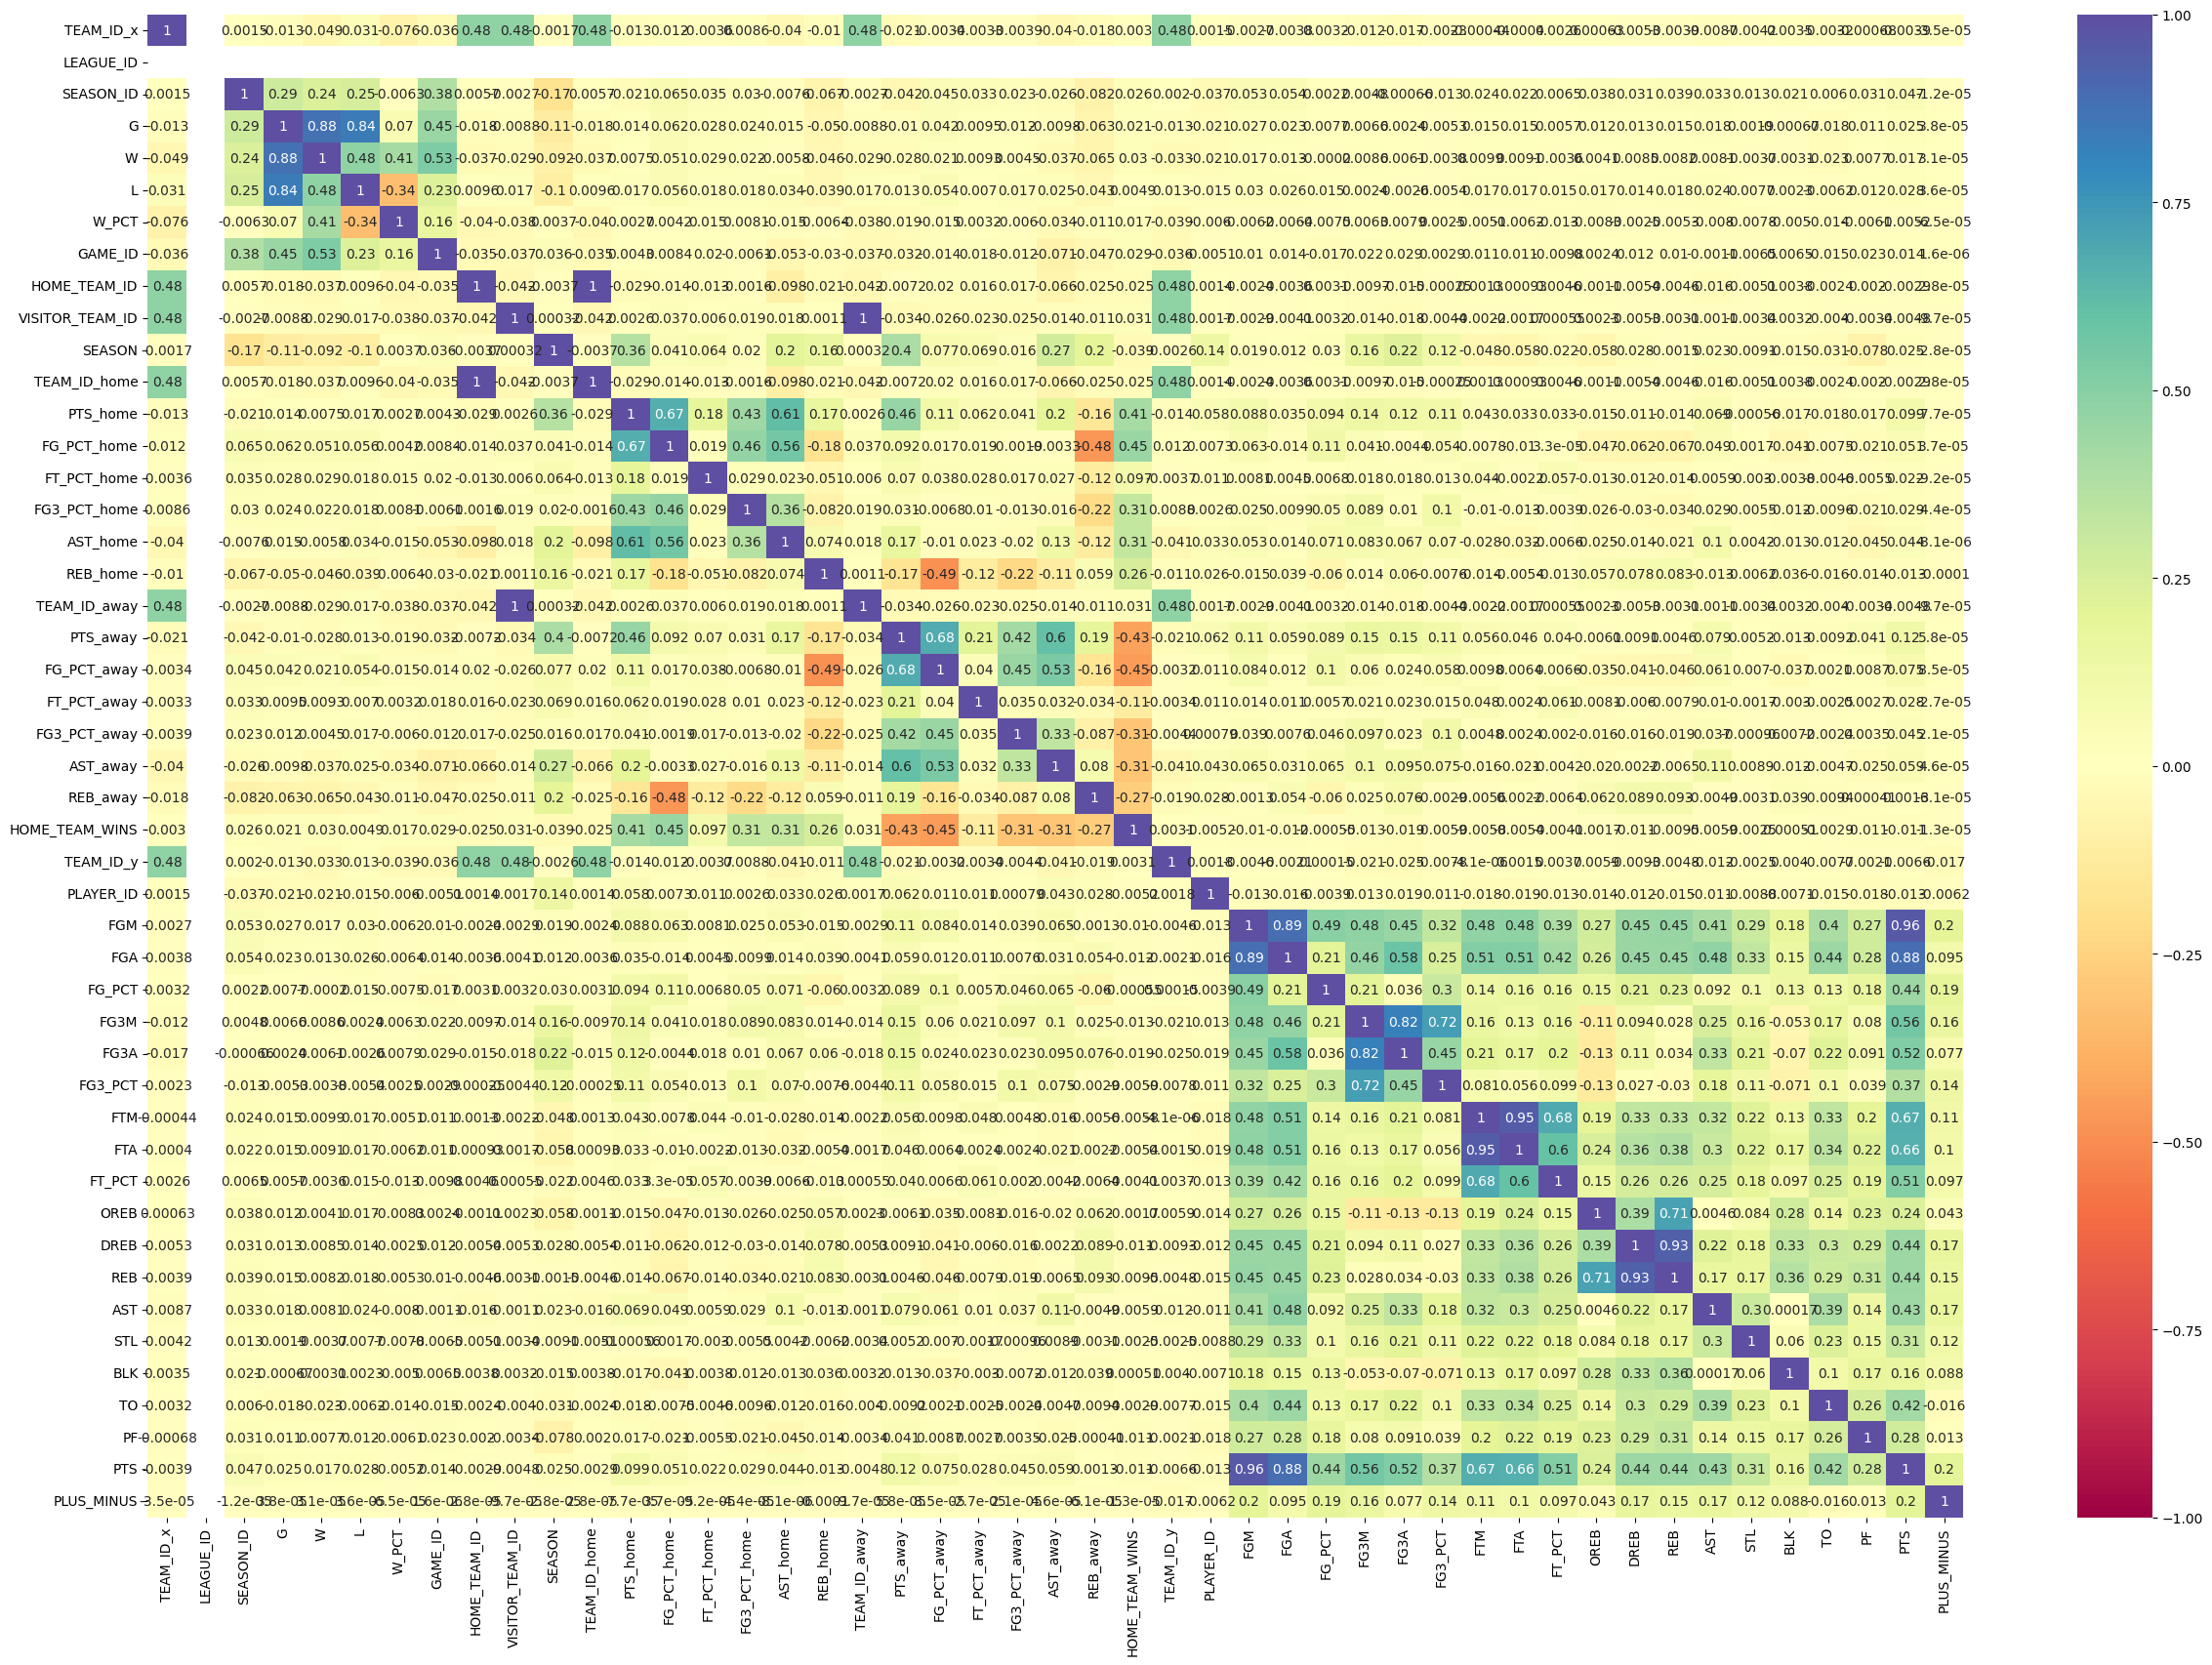

In [43]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_columns = nba.select_dtypes(include=numerics)
plt.figure(figsize = (30,20))
sns.heatmap(numerical_columns.corr(), annot= True, cmap = 'Spectral', vmin = -1, vmax = 1)


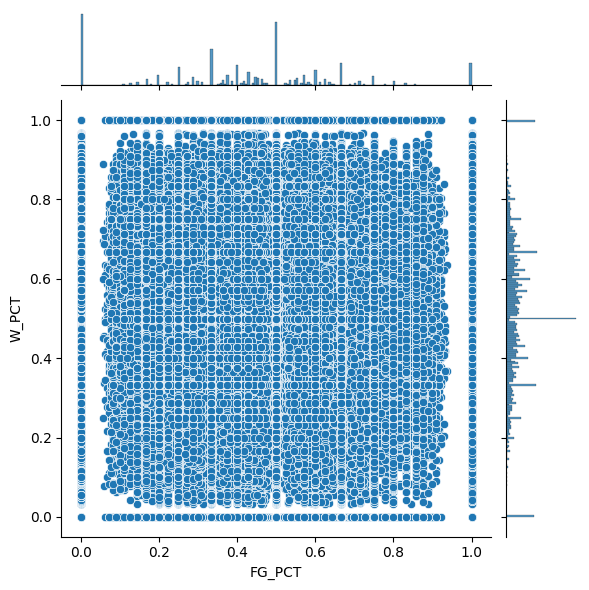

In [45]:
sns.jointplot(data= nba, 
              x= "FG_PCT", 
              y = "W_PCT", 
        
              )

# Predictive Classification Model

#### **POINTS: 20**
Use the Pycaret library to generate a binary classification model to predict the outcome of games. 

[Pycaret Tutorials](https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb)

Explain which metric one should use to evaluate the predition model (accuracy, precision, recall or F1-score).